## Sputteringシミュレーション中の近傍原子数分析

各SNAPSHOTの構造の各原子において、ある距離以下に位置する原子数を求める

***

In [129]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ovito.io import import_file, export_file
from ovito.io.ase import ovito_to_ase
from pymatgen.io.ase import AseAtomsAdaptor

from ovito.modifiers import CoordinationAnalysisModifier, TimeAveragingModifier

In [130]:
# path2dump = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/atom6750/model07/0deg_100eV'
path2dump = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/tersoff/atom6750/sample_for_minimum_distance/0deg_1000eV'

In [131]:
pipeline = import_file(os.path.join(path2dump, 'dump.lammpstrj'))

In [132]:
frame_index = 1000
data = pipeline.compute(frame_index)
ase_atoms = ovito_to_ase(data)

In [133]:
rcut = 1.0

pg_structure = AseAtomsAdaptor.get_structure(ase_atoms)
all_neighbors = pg_structure.get_all_neighbors(r=rcut)

In [134]:
# rcut = 1.0
# z_threshold = 40

# n_sites_list = []
# for frame_index in range(pipeline.source.num_frames):
#     ovito_atoms = pipeline.compute(frame_index)
#     ase_atoms = ovito_to_ase(ovito_atoms)
#     pg_structure = AseAtomsAdaptor.get_structure(ase_atoms)

#     reduced_structure = pg_structure.copy()
#     z_coords = pg_structure.cart_coords[:, 2]
#     indices_of_filtered_sites = [i for i, z_coord in enumerate(z_coords) if z_coord < z_threshold]
#     reduced_structure.remove_sites(indices_of_filtered_sites)
    
#     all_neighbors_reduced = reduced_structure.get_all_neighbors(r=rcut)

#     n_sites_list.append(
#         np.max([len(neighbors_each_site) for neighbors_each_site in all_neighbors_reduced])
#     )

In [135]:
# path2save = os.path.join(path2dump, 'neightbors.out')
# n_sites_list = list(map(str, n_sites_list))
# with open(path2save, mode='w') as f:
#     f.write('\n'.join(n_sites_list))

In [136]:
path2target = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/neighbor_analysis/tersoff_0deg_1000eV'

In [139]:
with open(os.path.join(path2target, 'neighbors.out'), mode='r') as f:
    lines = [s.strip() for s in f.readlines()]

In [141]:
lines = list(map(int, lines))

<BarContainer object of 2 artists>

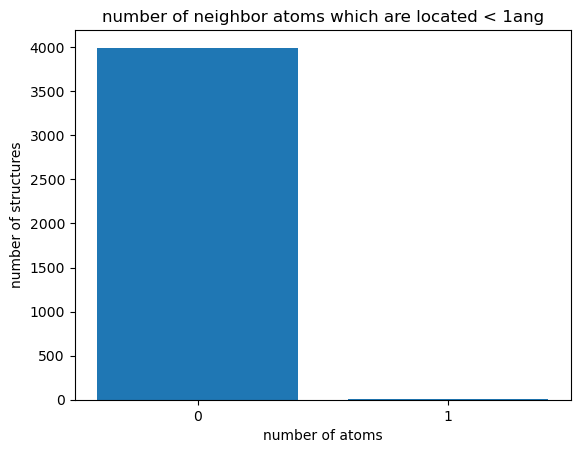

In [143]:
import collections

counter = collections.Counter(lines)

plt.title('number of neighbor atoms which are located < 1ang')
plt.xlabel('number of atoms')
plt.ylabel('number of structures')
plt.bar(list(map(str, list(counter.keys()))), list(counter.values()))

In [144]:
counter

Counter({0: 3994, 1: 7})